In [1]:
# 필요한 package 불러오기
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import matplotlib.axis as ax
import statistics

In [2]:
!git clone https://github.com/yun-seon/DX-Training-Hyundai-0707.git

Cloning into 'DX-Training-Hyundai-0707'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
Unpacking objects: 100% (21/21), done.
remote: Total 21 (delta 2), reused 0 (delta 0), pack-reused 0


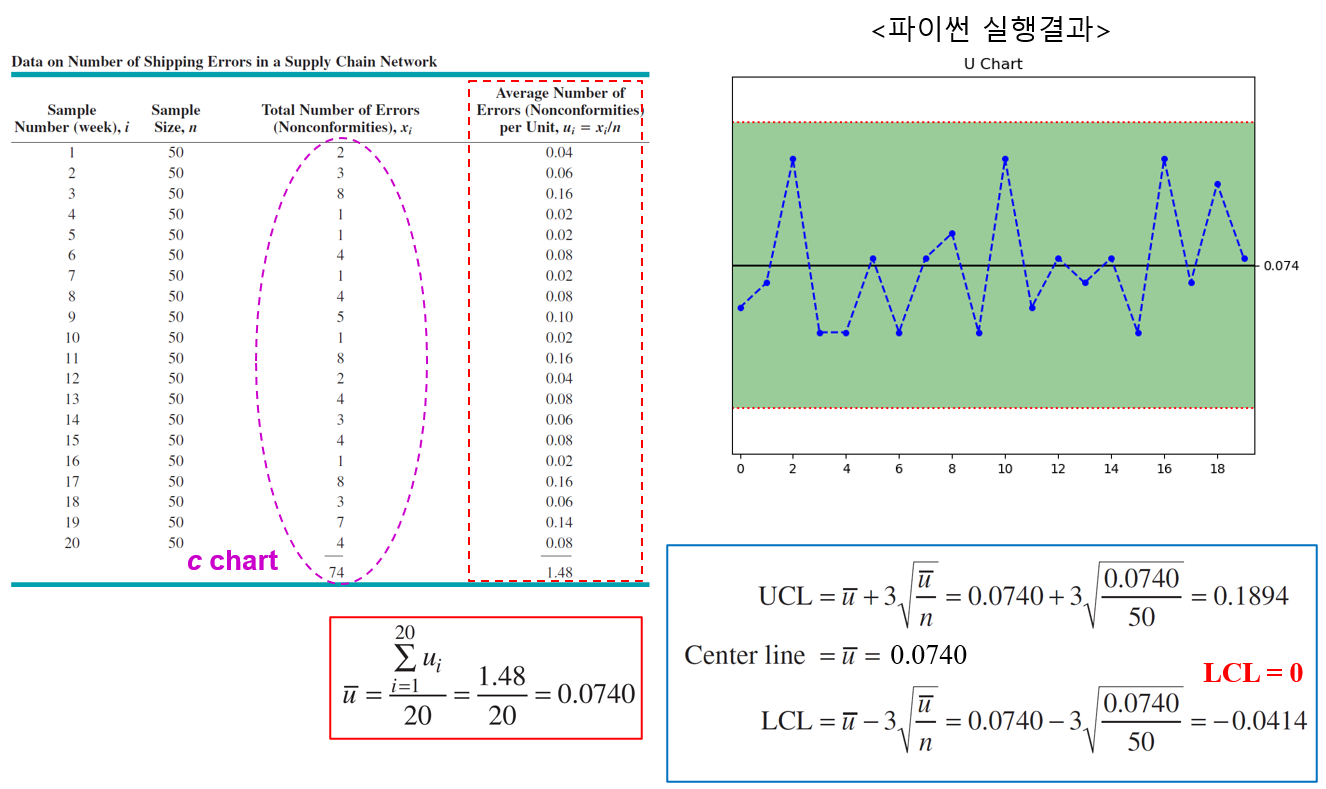

## (1) Example Data 활용하여 "u chart" 구축

In [46]:
# data 불러오기

ex = pd.read_csv("/content/DX-Training-Hyundai-0707/Data/example_u_chart.csv")
data = ex   
data.head()

,sample,value
0,10.0,14
1,8.0,12
2,13.0,20
3,10.0,11
4,9.5,7


In [47]:
# dataframe 형태를 변환

if isinstance(data, pd.DataFrame):
    data = data.values
data[:6]

array([[10. , 14. ],
       [ 8. , 12. ],
       [13. , 20. ],
       [10. , 11. ],
       [ 9.5,  7. ],
       [10. , 10. ]])

In [48]:
# u chart 구성을 위한 setting 값 설정

title_ = "u chart"
plt.style.use('grayscale')
mpl.rcParams['lines.markersize'] = 4

size = len(data[0]) 
layers = []
points = None
summary = []
size = size-1

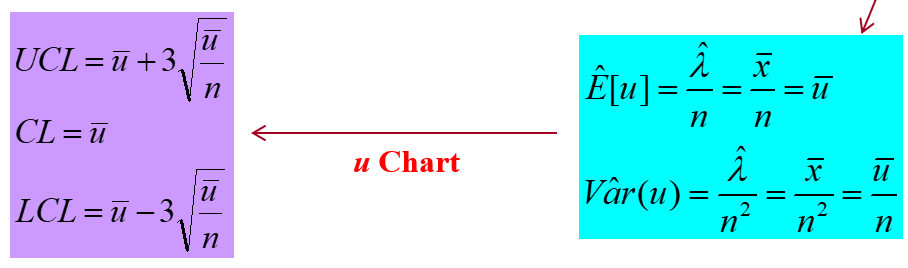

In [49]:
# Control Chart plotting 함수

def plot(data, size, newdata=None):

    data = data.T

    data2 = data / size # u_i
    ubar = np.sum(data2) / len(data2)

    lcl, ucl, lcl2 = [], [], []
    for i in size:
        lcl.append(ubar - 3 * np.sqrt(ubar / i))
        ucl.append(ubar + 3 * np.sqrt(ubar / i))
    
    for l in range(len(lcl)):
        if lcl[l] < 0:
            lcl2.append(0)
        else:
           lcl2.append(lcl[l])

    return (data2, ubar, lcl2, ucl, title_)

In [50]:
# 데이터 값 구분에 따른 빈도수로 표현

size = size - 1
sizes, data = data.T

print("size: \n", sizes)
print("data: \n", data)

size: 
 [10.   8.  13.  10.   9.5 10.  12.  10.5 12.  12.5]
data: 
 [14. 12. 20. 11.  7. 10. 21. 16. 19. 23.]


In [51]:
# 데이터를 count로 표현

data2 = data / sizes # u_i
ubar = np.sum(data2) / len(data2)

print("count data: \n", data2)
print("ubar: ", ubar)
print("mean of sizes: ", np.mean(sizes))

count data: 
 [1.4        1.5        1.53846154 1.1        0.73684211 1.
 1.75       1.52380952 1.58333333 1.84      ]
ubar:  1.3972446500867552
mean of sizes:  10.75


In [52]:
lcl, ucl = [], []
for i in sizes:
    lcl.append(ubar - 3 * np.sqrt(ubar / i))
    ucl.append(ubar + 3 * np.sqrt(ubar / i))

In [53]:
print(ucl)
print(lcl)

[2.5186367247324073, 2.6509991042553533, 2.380770561942071, 2.5186367247324073, 2.5477686428730535, 2.5186367247324073, 2.420930875238323, 2.491611257537354, 2.420930875238323, 2.4002482134216336]
[0.2758525754411032, 0.14349019591815693, 0.41371873823143934, 0.2758525754411032, 0.246720657300457, 0.2758525754411032, 0.37355842493518754, 0.3028780426361566, 0.37355842493518754, 0.39424108675187663]


In [54]:
# plot 함수 통해 UCL, LCL 계산

result= plot(data, sizes, newdata=None)
data = result[0]
cbar = result[1]
lcl = result[2]
ucl = result[3]
title = _title = result[4]

print("count data: \n", data)
print("ubar: ", ubar)
print("Lower control limit (LCL): ", lcl)
print("Upper control limit (UCL): ", ucl)
print("Chart title: ", title_)

count data: 
 [1.4        1.5        1.53846154 1.1        0.73684211 1.
 1.75       1.52380952 1.58333333 1.84      ]
ubar:  1.3972446500867552
Lower control limit (LCL):  [0.2758525754411032, 0.14349019591815693, 0.41371873823143934, 0.2758525754411032, 0.246720657300457, 0.2758525754411032, 0.37355842493518754, 0.3028780426361566, 0.37355842493518754, 0.39424108675187663]
Upper control limit (UCL):  [2.5186367247324073, 2.6509991042553533, 2.380770561942071, 2.5186367247324073, 2.5477686428730535, 2.5186367247324073, 2.420930875238323, 2.491611257537354, 2.420930875238323, 2.4002482134216336]
Chart title:  u chart


In [55]:
values = data
center = ubar
num = len(data) # Control Limit (CL) : u bar

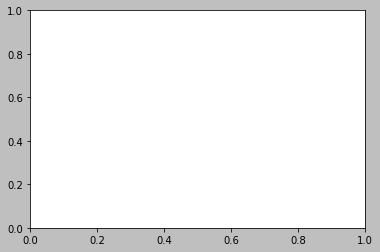

In [56]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) # suplot 추가 가능
#ax.yaxis.tick_right() # 축을 오른쪽에 표현하고자 할 때, 사용 가능

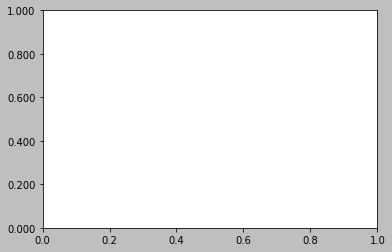

In [57]:
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f')) # 축의 수치를 소수점 셋째자리까지 표현
fig

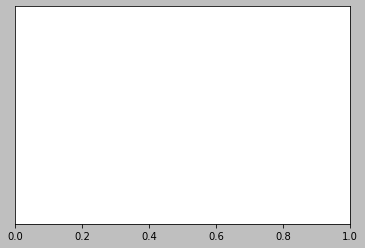

In [58]:
ax.yaxis.set_ticks([center]) # Center (CL) 표현을 위해 축 변경
fig

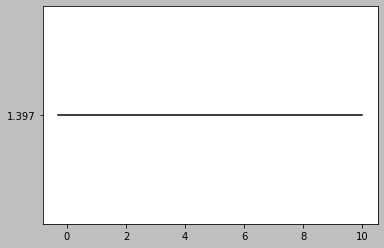

In [59]:
ax.plot([-0.3, num], [center, center], 'k-') # Center (CL) 표현을 위해 실선 표시
fig

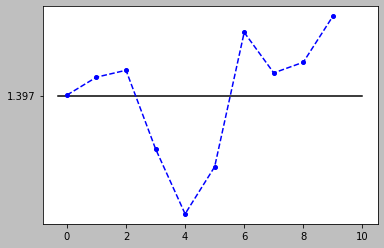

In [60]:
ax.plot(values, 'bo--') # 측정 값에 대해 파란 점선 표시
fig

In [61]:
newx = list(range(num))
newx[0] = -0.3
newx[-1] = num - 0.6

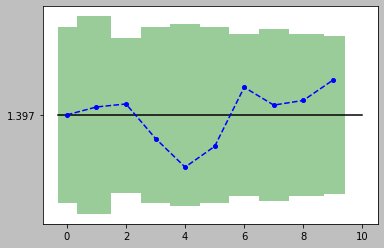

In [62]:
ax.fill_between(newx, lcl, ucl, facecolor='green', alpha=0.4, step='mid') # UCL, LCL에 대한 영역 표시
fig

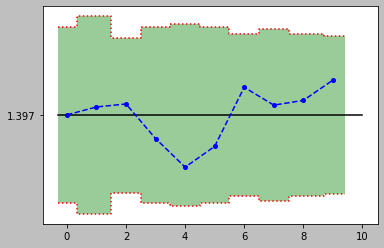

In [63]:
# different sample size를 반영한 UCL, LCL의 점선 표시
ax.step(newx, lcl, 'r:', where='mid')
ax.step(newx, ucl, 'r:', where='mid')
fig

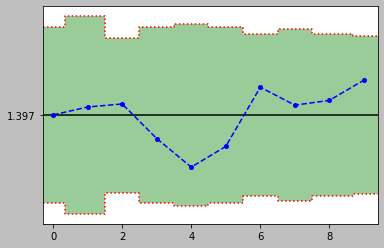

In [64]:
# X 축 설정 변경
new_xlim = [0, num]
ax.set_xlim([0, num] + np.array((-0.3, -0.6)))
ax.xaxis.set_ticks(np.arange(*new_xlim, 2))
fig

## (2) Simulation Data 활용하여 "p chart" Fitting

In [65]:
# Simulation data 생성

# Set random seed
np.random.seed(42)

# Create dummy data
u = {'defects':np.random.randint(1,5,10).tolist(),
    'group_size':np.random.randint(10,15,10).tolist()}

# Convert data to data frame
u = pd.DataFrame(u)
u['defects'][4] = 0
u['defects'][7] = 12

# Add 'u' column to data frame
u['u'] = u['defects']/u['group_size']
u

,defects,group_size,u
0,3,12,0.250000
1,4,12,0.333333
2,1,12,0.083333
3,3,14,0.214286
4,0,13,0.000000
5,4,12,0.333333
6,1,14,0.071429
7,12,11,1.090909
8,3,13,0.230769
9,2,11,0.181818


In [66]:
cl = statistics.mean(u['u'])
ucl = cl + 3 * np.sqrt(cl/u['group_size'])
lcl = cl - 3 * np.sqrt(cl/u['group_size'])
lcl = lcl.map(lambda x : max(0, x))

print("Control Limit: ", cl)
print("Upper Control Limit: ", ucl)
print("Lower Control Limit: ", lcl)

Control Limit:  0.2789210789210789
Upper Control Limit:  0    0.736295
1    0.736295
2    0.736295
3    0.702367
4    0.718352
5    0.736295
6    0.702367
7    0.756632
8    0.718352
9    0.756632
Name: group_size, dtype: float64
Lower Control Limit:  0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: group_size, dtype: int64


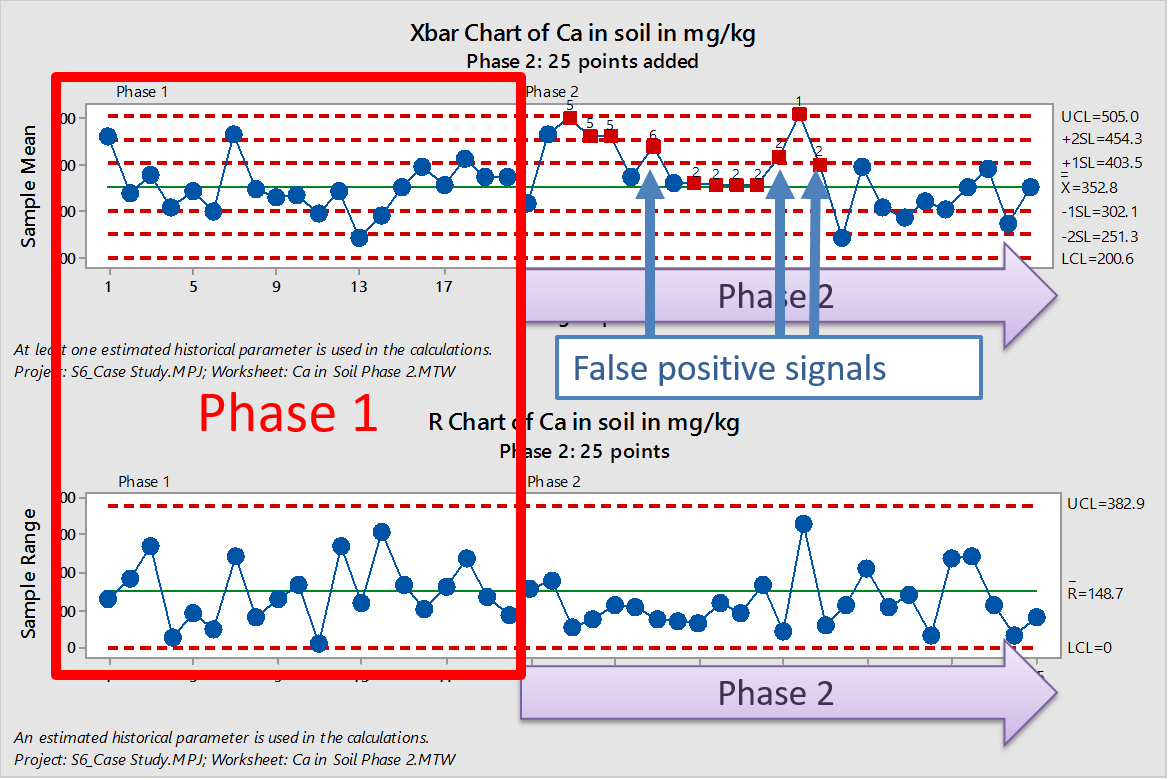

> Phase I (* Phase 2는 p/np chart와 동일하게 반복)

In [67]:
print("Control Limit: ", cl)
print("Upper Control Limit: ", ucl)
print("Lower Control Limit: ", lcl)

Control Limit:  0.2789210789210789
Upper Control Limit:  0    0.736295
1    0.736295
2    0.736295
3    0.702367
4    0.718352
5    0.736295
6    0.702367
7    0.756632
8    0.718352
9    0.756632
Name: group_size, dtype: float64
Lower Control Limit:  0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: group_size, dtype: int64


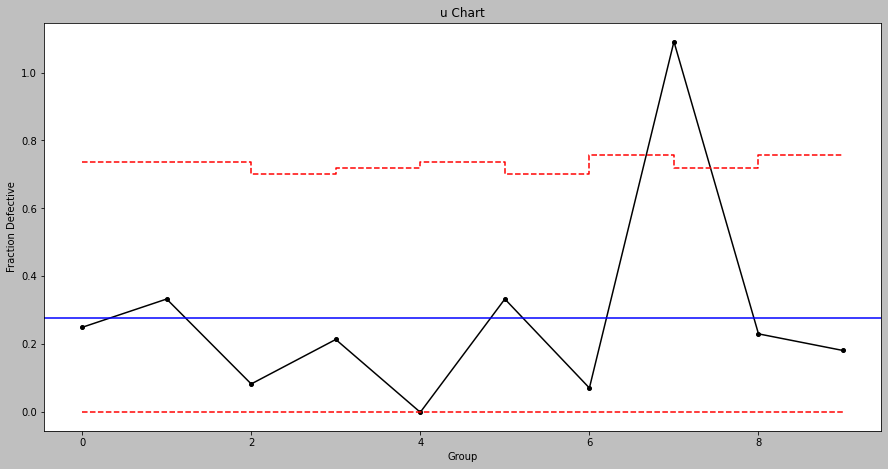

In [68]:
# u chart 그래프 시각화

plt.figure(figsize=(15,7.5))
plt.plot(u['u'], linestyle='-', marker='o', color='black')
plt.step(x=range(0, len(u['u'])), y=ucl, color='red', linestyle='dashed')
plt.step(x=range(0, len(u['u'])), y=lcl, color='red', linestyle='dashed')
plt.axhline(cl, color='blue')
plt.title('u Chart')
plt.xlabel('Group')
plt.ylabel('Fraction Defective')
plt.show()

In [69]:
# Phase I 단계에서 Control Limit을 벗어나는 점 확인

i = 0
control = True
for group in u['u']:
    if group > ucl[i] or group < lcl[i]:
        print('Group', i, 'out of fraction defective cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

Group 7 out of fraction defective cotrol limits!


In [70]:
# Control limit을 벗어나는 7번 데이터 삭제

new_u = u.drop([7]).reset_index()
new_u

,index,defects,group_size,u
0,0,3,12,0.250000
1,1,4,12,0.333333
2,2,1,12,0.083333
3,3,3,14,0.214286
4,4,0,13,0.000000
5,5,4,12,0.333333
6,6,1,14,0.071429
7,8,3,13,0.230769
8,9,2,11,0.181818


In [71]:
# Control Limit을 벗어나는 점을 제외하고, Control Limit 다시 연산

new_cl = statistics.mean(new_u['u'])
new_ucl = new_cl+3*np.sqrt(new_cl/new_u['group_size'])
new_lcl = new_cl-3*np.sqrt(new_cl/new_u['group_size'])
new_lcl = new_lcl.map(lambda x : max(0, x))

print("Control Limit: ", new_cl)
print("Upper Control Limit: ", new_ucl)
print("Lower Control Limit: ", new_lcl)

Control Limit:  0.1887001887001887
Upper Control Limit:  0    0.564898
1    0.564898
2    0.564898
3    0.536992
4    0.550140
5    0.564898
6    0.536992
7    0.550140
8    0.581626
Name: group_size, dtype: float64
Lower Control Limit:  0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
Name: group_size, dtype: int64


In [72]:
# Control limit을 벗어나는 7번 점을 제외하고, Phase I 단계에서 Control Limit을 벗어나는 점 확인

i = 0
control = True
for group in new_u['u']:
    if group > new_ucl[i] or group < new_lcl[i]:
        print('Group', i, 'out of fraction defective cotrol limits!')
        control = False
    i += 1
if control == True:
    print('All points within control limits.')

All points within control limits.


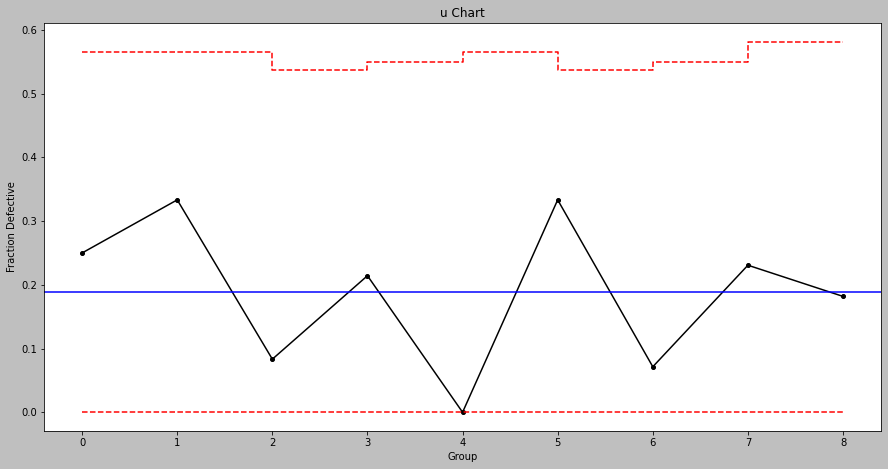

In [73]:
# Control Limit을 벗어나는 점 제외한 후, Phase I Control Chart 구축

plt.figure(figsize=(15,7.5))
plt.plot(new_u['u'], linestyle='-', marker='o', color='black')
plt.step(x=range(0, len(new_u['u'])), y=new_ucl, color='red', linestyle='dashed')
plt.step(x=range(0, len(new_u['u'])), y=new_lcl, color='red', linestyle='dashed')
plt.axhline(new_cl, color='blue')
plt.title('u Chart')
plt.xlabel('Group')
plt.ylabel('Fraction Defective')
plt.show()